In [2]:
import json
from sklearn.preprocessing import LabelEncoder
import numpy as np
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt

# READ DATA

In [3]:
with open(r'C:\Users\VICTUS\Desktop\hackathon\cleaned_meal_recommendations.json') as file : # load the data form json file
    data=json.load(file)

In [4]:
data['data']

[{'tag': 'Muscle Building',
  'patterns': ['Suggest a muscle building meal',
   'I need a meal for muscle building',
   'Recommend a muscle building diet',
   'What should I eat for muscle building goals?',
   'Give me a muscle building meal plan'],
  'responses': [{'meal': 'Grilled chicken with quinoa and steamed broccoli',
    'calories': 370,
    'protein': 45,
    'carbs': 77,
    'fat': 28,
    'description': 'Blend all ingredients together until smooth.'},
   {'meal': 'Scrambled eggs with turkey and spinach',
    'calories': 585,
    'protein': 41,
    'carbs': 11,
    'fat': 30,
    'description': 'Sauté in olive oil over medium heat for 7 minutes.'},
   {'meal': 'Salmon with sweet potatoes and asparagus',
    'calories': 289,
    'protein': 47,
    'carbs': 36,
    'fat': 15,
    'description': 'Grill the ingredients for 10 minutes until golden brown.'},
   {'meal': 'Beef steak with roasted vegetables and avocado',
    'calories': 354,
    'protein': 22,
    'carbs': 32,
    'f

# SPLIT THE DATA

In [5]:
'''
split the data for the labels , patterns and resonses
'''
training_example=[]
training_labels=[]
response=[]
for example in data['data']:
  for pattern in example['patterns']:
    training_example.append(pattern.lower())
    training_labels.append(example['tag'])
  response.append(example['responses'])

# PREPROCESSING

In [6]:
import re
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english')
print(stop_words)

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VICTUS\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
import nltk
from nltk.stem import PorterStemmer

ps = PorterStemmer()

def Stemming(text):
    tokens = text.split()
    stemming = []
    for token in tokens:
      if token not in stop_words:
        stem = ps.stem(token)
        stemming.append(stem)

    return ' '.join(stemming)

In [8]:
def clean_text(text):
    #clean text
    text = text.lower() # lower
    text=re.sub('(#|@)\w*',"",text)# \w [a-z|A_Z|0-9|_]
    text=re.sub("https:\/\/\S+","",text)
    text=re.sub("(\?|\!|\:|\'|\\|\.|\/|,|\*|\`)+","",text)
    text=re.sub("^\s+","",text)

    text = Stemming(text)

    return text

<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\/'
<>:6: SyntaxWarning: invalid escape sequence '\?'
<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\w'
<>:5: SyntaxWarning: invalid escape sequence '\/'
<>:6: SyntaxWarning: invalid escape sequence '\?'
<>:7: SyntaxWarning: invalid escape sequence '\s'
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_1424\3052829142.py:4: SyntaxWarning: invalid escape sequence '\w'
  text=re.sub('(#|@)\w*',"",text)# \w [a-z|A_Z|0-9|_]
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_1424\3052829142.py:5: SyntaxWarning: invalid escape sequence '\/'
  text=re.sub("https:\/\/\S+","",text)
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_1424\3052829142.py:6: SyntaxWarning: invalid escape sequence '\?'
  text=re.sub("(\?|\!|\:|\'|\\|\.|\/|,|\*|\`)+","",text)
C:\Users\VICTUS\AppData\Local\Temp\ipykernel_1424\3052829142.py:7: SyntaxWarning: invalid escape sequence '\s'
  text

In [9]:
final_example=[]
for example in training_example:
  final_example.append(clean_text(example))

In [10]:
'''
label encoder to get each word a number 
'''
le=LabelEncoder()
le.fit(training_labels)
training_labels=le.fit_transform(training_labels)

In [11]:
'''
to make all the label same size
'''
training_labels=to_categorical(training_labels)

In [12]:
'''
get each word at the sequence a number for it using for loop
'''
from tensorflow.keras.preprocessing.text import one_hot
Sequence=[one_hot(example,50,filters='') for example in final_example]

In [13]:
'''
padding is making the data has the same size that will be input to the model 
beacuse the input must be the same size
maxlen=15 its for the max size of seq its near to be 15
'''
padded_sequence=pad_sequences(Sequence,truncating='post',maxlen=15)

# MODEL

In [14]:
'''
this is a so simple model for this data
'''

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,Flatten,Dropout
model = Sequential()
model.add(Embedding(50, 100, input_length=15))  
model.add(Dropout(0.3))  
model.add(Flatten())
model.add(Dense(32, activation='relu'))  
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adamw', metrics=['accuracy'])
model.summary()

c:\anaconda\anaconda\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [19]:
history=model.fit(np.array(padded_sequence),training_labels,epochs=1000)

Epoch 1/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7433 - loss: 0.3928
Epoch 2/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.7804 - loss: 0.3464  
Epoch 3/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7404 - loss: 0.3765 
Epoch 4/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7567 - loss: 0.4075
Epoch 5/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7462 - loss: 0.3731 
Epoch 6/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8546 - loss: 0.3446
Epoch 7/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7567 - loss: 0.4281 
Epoch 8/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8012 - loss: 0.3334  
Epoch 9/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7567 - loss: 0.3604 
Epoch 10/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.8117 - loss: 0.5772
Epoch 11/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.7567 - loss: 0.4009 
Epoch 12/1000
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - accuracy: 0.827

In [20]:
model.evaluate(np.array(padded_sequence),training_labels)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8146 - loss: 0.2800 


[0.3309980630874634, 0.800000011920929]

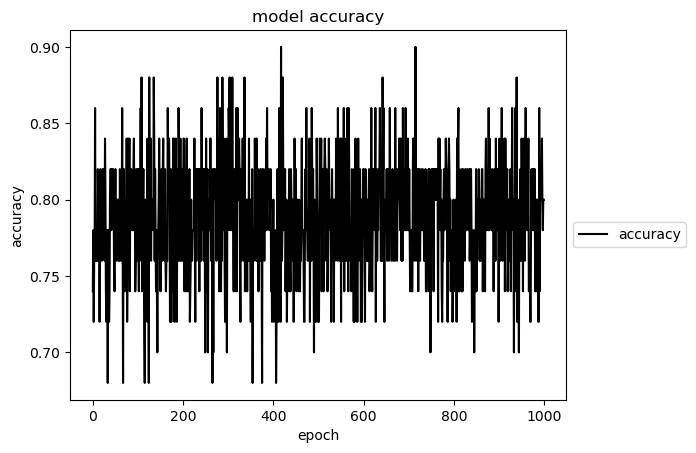

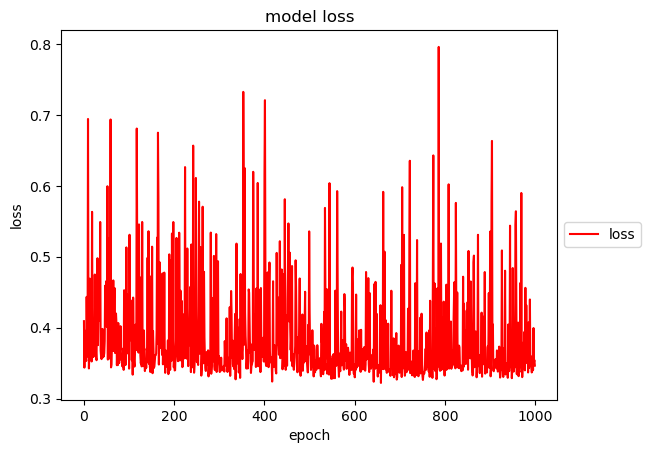

In [21]:
plt.plot(history.history['accuracy'],color='black')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy'], loc='upper left', bbox_to_anchor=(1,0.5))
plt.show()
plt.plot(history.history['loss'],color='red')
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss'], loc='upper left', bbox_to_anchor=(1,0.5))
plt.show()

# PREDICTION

In [22]:
value=('i want a meal for build muscle')
value=clean_text(value)
print(value)
sequnces=[one_hot(example,50, filters='') for example in [value]]


sent=pad_sequences(sequnces,truncating='post',maxlen=15)
    

result=np.argmax(model.predict(np.array(sent)))
    

f_res=le.inverse_transform(np.array(result).reshape(1))
    
   
for label in data['data']:
    if label['tag']==f_res:
        print(f_res)
        output=np.random.choice(label['responses'])
        print(output)
        break

want meal build muscl
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step
['Muscle Building']
{'meal': 'Scrambled eggs with turkey and spinach', 'calories': 585, 'protein': 41, 'carbs': 11, 'fat': 30, 'description': 'Sauté in olive oil over medium heat for 7 minutes.'}
